<a href="https://colab.research.google.com/github/Saifullah785/Agentic_AI_LangGraph_Learning_Journey/blob/main/Build_A_Chatbot_Using_LangGraph/basic_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install necessary libraries
# ! pip install langchain_openai
# ! pip install langgraph

In [3]:
# Import necessary libraries
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [4]:
# Get API key from Colab user data

from google.colab import userdata
OPENAI_API_KEY= userdata.get('OPENAI_API_KEY')

In [5]:
# Initialize the ChatOpenAI model

llm = ChatOpenAI(
    model="gpt-4o-mini",openai_api_key=OPENAI_API_KEY)

In [ ]:
# Load environment variables
# load_dotenv()

True

In [6]:
# Define the state for the chatbot
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [8]:



def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [9]:
# Build the graph
graph = StateGraph(ChatState)


# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot= graph.compile()

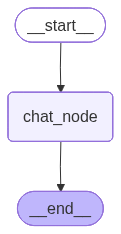

In [10]:
# Display the compiled chatbot
chatbot

In [11]:
# Invoke the chatbot with an initial message
initial_state = {
    'messages': [HumanMessage(content="Hello, what is quantum physics?")]

}
chatbot.invoke(initial_state)['messages'][-1].content

"Quantum physics, or quantum mechanics, is a fundamental branch of physics that describes the physical properties of nature at the scale of atoms and subatomic particles. It provides a theoretical framework for understanding the behavior of matter and energy in ways that classical physics cannot explain.\n\nKey concepts of quantum physics include:\n\n1. **Wave-Particle Duality**: Particles, such as electrons and photons, exhibit both wave-like and particle-like properties. This duality is famously illustrated by the double-slit experiment, which demonstrates that particles can behave like waves, creating interference patterns.\n\n2. **Quantization**: Certain properties, such as energy, are quantized, meaning they can only take on discrete values rather than a continuous range. For example, electrons in an atom occupy specific energy levels.\n\n3. **Superposition**: A quantum system can exist in multiple states at once until it is measured. Upon measurement, the system 'collapses' to on